In [3]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import random_state
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

import warnings
warnings.filterwarnings('ignore')



In [4]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())
        

In [5]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [6]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [7]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [8]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [61]:
def hamiltonian(t):
    circ = QuantumCircuit(2, 2)
    circ.h(range(2))
    circ.cx(0, 1)
    circ.rz(np.pi*t, 1)
    circ.cx(0, 1)
    circ.h(range(2))
    circ.measure(range(2), range(2))
    return circ

In [65]:
circ = hamiltonian(1)

In [66]:
circ.draw('mpl')

In [67]:
getMeasure(circ, 1)

['11']

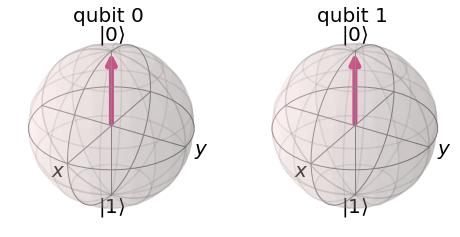

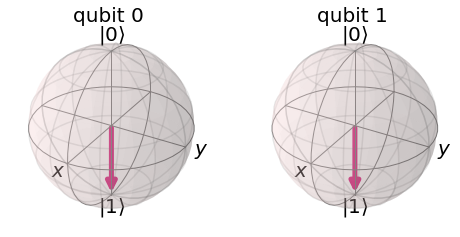

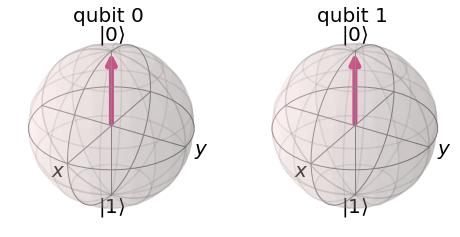

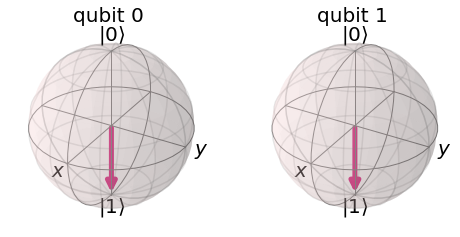

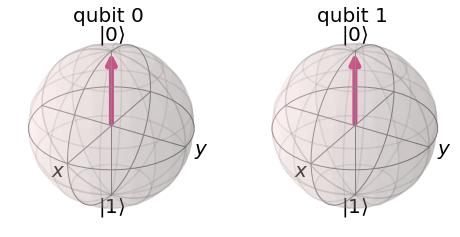

In [68]:
for t in range(0, 5):
    circ = hamiltonian(t)
    display(getBloch(circ))